In [1]:
%load_ext autotime

time: 136 µs (started: 2023-08-30 15:30:39 +02:00)


In [2]:
import warnings
warnings.filterwarnings('ignore')

time: 561 µs (started: 2023-08-30 15:30:39 +02:00)


In [3]:
import joblib
import string
from mie_icon_art import *

2023-08-30 15:30:41.280561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 15:30:41.476098: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-30 15:30:41.476123: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-30 15:30:42.781651: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

time: 5.38 s (started: 2023-08-30 15:30:39 +02:00)


In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

time: 179 ms (started: 2023-08-30 15:30:44 +02:00)


In [5]:
mode_name = {'ait':'aitken', 'acc':'accumulation', 'coa':'coarse'}

time: 264 µs (started: 2023-08-30 15:30:44 +02:00)


In [6]:
height = 75
dxx = 0.5
lam = 0.55   

time: 4.38 ms (started: 2023-08-30 15:30:44 +02:00)


In [7]:
map_ext = (-6, 18, 35, 55)
gridfile = '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/iconR2B06_DOM01.nc'

time: 2.32 ms (started: 2023-08-30 15:30:44 +02:00)


In [8]:
filenames = sorted(glob.glob('/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01*.nc'))[1:-1]
filenames

['/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0002.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0003.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0004.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0005.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0006.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0007.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0008.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0009.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0010.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0011.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0012.nc',
 '/scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0013.nc',
 '/scratch/b/b38

time: 6.41 ms (started: 2023-08-30 15:30:44 +02:00)


In [9]:
# model = '/work/bb1070/b382177/mie/icon/05-07-2023/model/model_05-07-2023_new.h5'
# fscale = "/work/bb1070/b382177/mie/icon/05-07-2023/model/mlp_min_max.csv"
# qt_model = '/work/bb1070/b382177/mie/icon/05-07-2023/model/transformer_new.pkl'

model = '/work/bb1070/b382177/mie/icon/17-08-2023/model/model_17-08-2023.h5'
fscale = "/work/bb1070/b382177/mie/icon/05-07-2023/model/mlp_min_max.csv"
qt_model = '/work/bb1070/b382177/mie/icon/17-08-2023/model/transformer_17-08-2023.pkl'

time: 347 µs (started: 2023-08-30 15:30:44 +02:00)


In [10]:
for mode in ['coa']:
    print('Working on %s mode'%mode)
    for filename in filenames[-2:-1]:
        print('Processing %s'%filename)
        ds = xr.open_dataset(filename).isel(height_2=height)
        modes = ds.icon.get_modes(mode_type='mixed')

        mie = Mie(ds, gridfile, lam, map_ext, dxx, core=['dust', 'soot', 'na', 'cl'], shell=['h2o', 'so4', 'nh4', 'no3'], soot='soot', mode=mode) # For other modes
        # mie = Mie(ds, gridfile, lam, map_ext, dxx, core=['soot'], shell=['h2o', 'so4', 'nh4', 'no3'], soot='soot', mode=mode) # For Aitken mode

Working on coa mode
Processing /scratch/b/b380982/ICON-OUTPUT/6_Gnu_Age/icon-art-aging-aero_DOM01_ML_0022.nc
time: 191 ms (started: 2023-08-30 15:30:44 +02:00)


In [11]:
prop = mie.calculate_optics()

Calculating Shell thickness and Mapping composition to Refractive Indices...
Mapping Mode to Bins...
Calculating Optical properties now...
(27825, 18)
Input data preparation done...
Performing Mie calculations now...
Elapsed time in Mie calculation: 131.1155400276184
Calculating bulk properties now...
Gridding optical properties now...
Mie calcualtions finished.
time: 3min 6s (started: 2023-08-30 15:30:45 +02:00)


In [12]:
#eprop = mie.emulate()
#eprop = mie.emulate(model1=model1, model2=model2, fscale=fscale)
eprop = mie.emulate1(model_name=model, fscale=fscale, qt_model=qt_model)

2023-08-30 15:33:51.935044: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-30 15:33:51.935075: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-30 15:33:51.935090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (l40010.lvt.dkrz.de): /proc/driver/nvidia/version does not exist
2023-08-30 15:33:51.935589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Performing MLP emulation using model checkpoint: /work/bb1070/b382177/mie/icon/17-08-2023/model/model_17-08-2023.h5
4/4 [==============================] - 0s 4ms/step
Elapsed time in emulation: 0.1820998191833496
time: 13.5 s (started: 2023-08-30 15:33:51 +02:00)


/work/bb1070/b382177/mlp/figs/heike/6_Gnu_Age_icon-art-aging-aero_DOM01_ML_0022_height_75_mode_coa.png



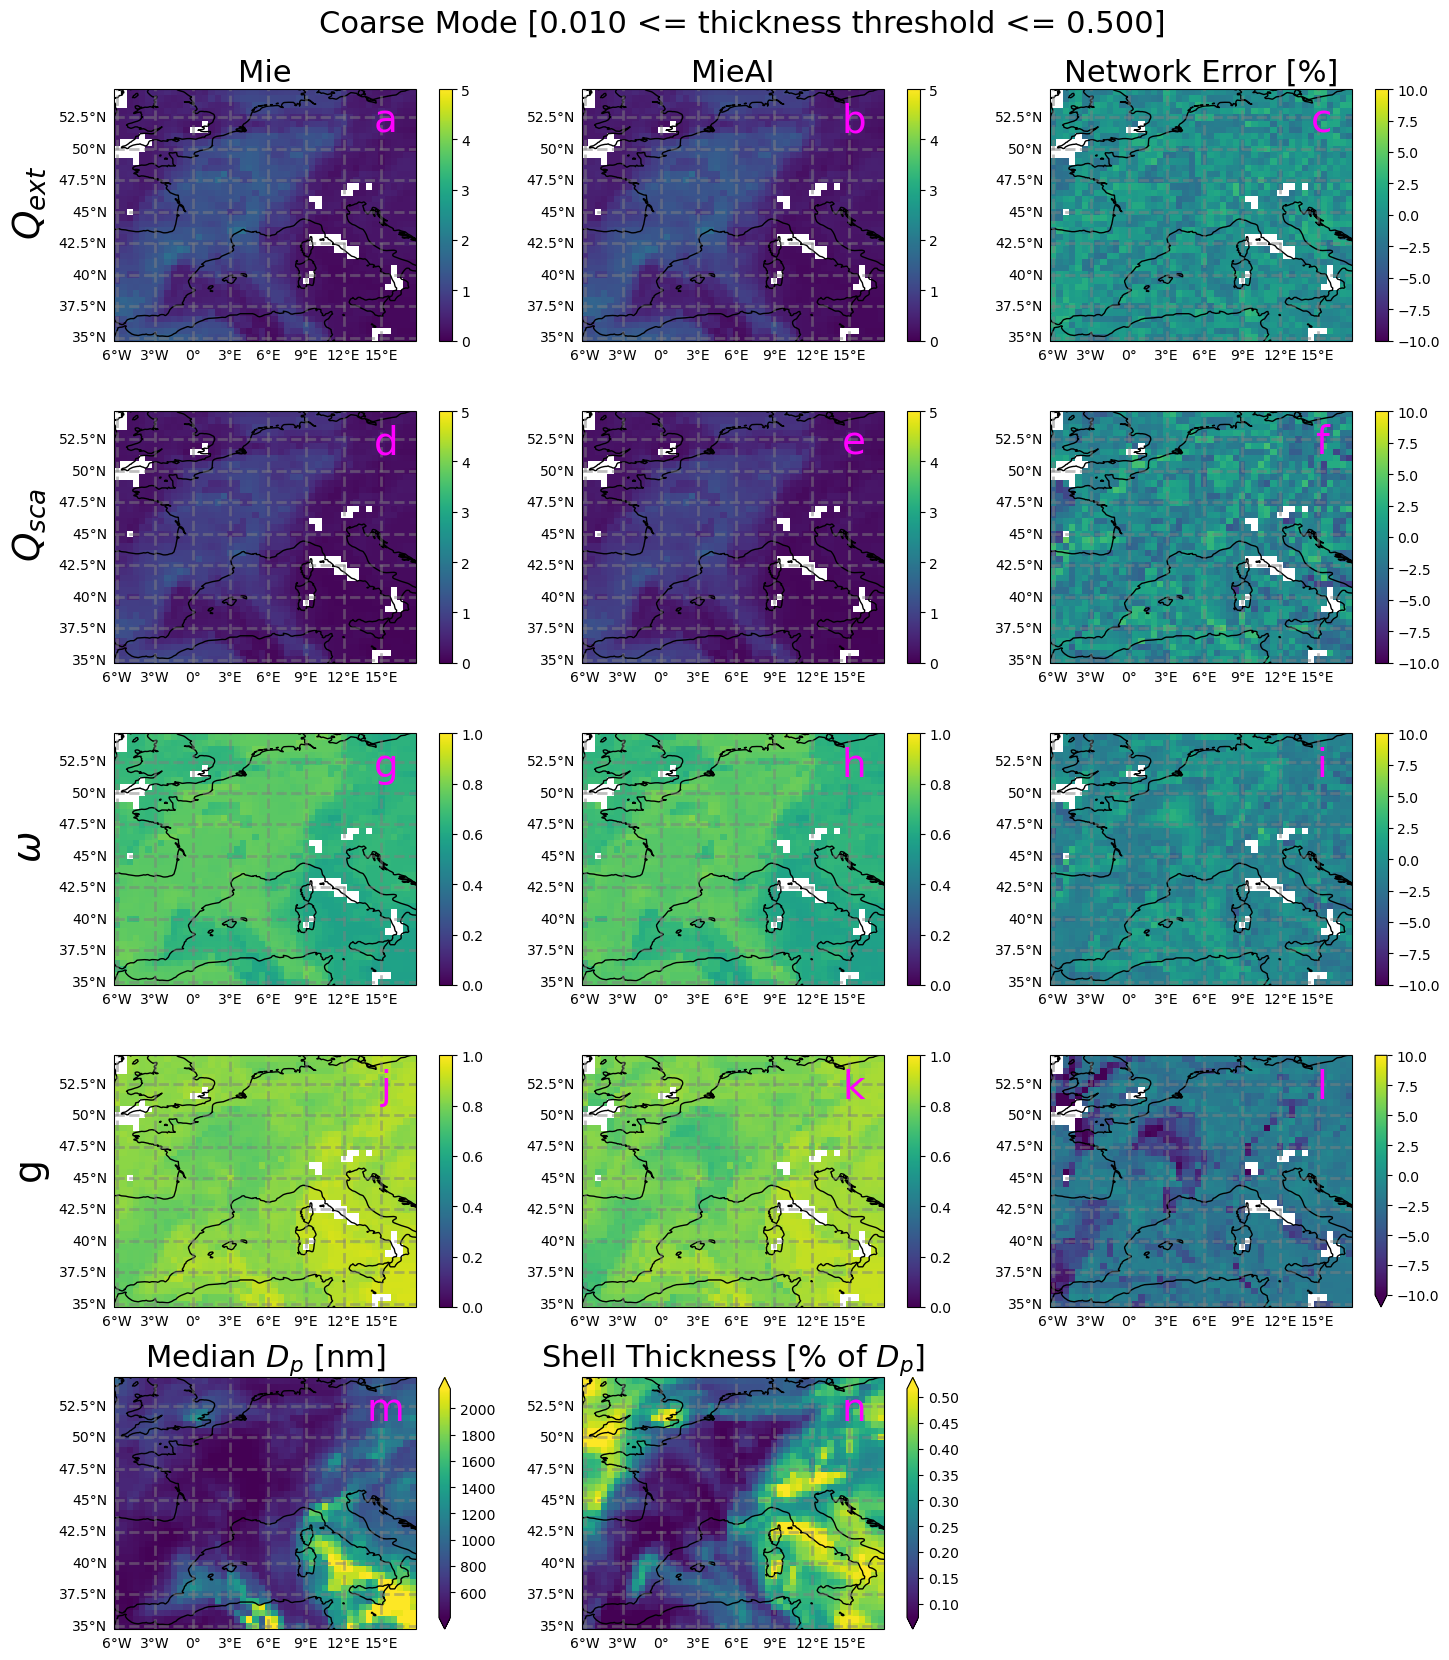

time: 14 s (started: 2023-08-30 15:48:08 +02:00)


In [15]:
thres1 = 0.01
thres2 = 0.5

cond = (mie.rcoat >= thres1) & (mie.rcoat <= thres2)

fig = plt.figure(figsize=(18, 20))
ax1 = fig.add_subplot(5, 3, 1, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(5, 3, 2, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(5, 3, 3, projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(5, 3, 4, projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(5, 3, 5, projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(5, 3, 6, projection=ccrs.PlateCarree())
ax7 = fig.add_subplot(5, 3, 7, projection=ccrs.PlateCarree())
ax8 = fig.add_subplot(5, 3, 8, projection=ccrs.PlateCarree())
ax9 = fig.add_subplot(5, 3, 9, projection=ccrs.PlateCarree())
ax10 = fig.add_subplot(5, 3, 10, projection=ccrs.PlateCarree())
ax11 = fig.add_subplot(5, 3, 11, projection=ccrs.PlateCarree())
ax12 = fig.add_subplot(5, 3, 12, projection=ccrs.PlateCarree())

ax13 = fig.add_subplot(5, 3, 13, projection=ccrs.PlateCarree())
ax14 = fig.add_subplot(5, 3, 14, projection=ccrs.PlateCarree())

axes = (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14)

col = 'Extinction'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax1, vmax=5, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax2, vmax=5, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax3, vmax=10, vmin=-10, robust=True)

col = 'Scattering'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax4, vmax=5, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax5, vmax=5, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax6, vmax=10, vmin=-10, robust=True)

col = 'SSA'
# prop[col] = prop['Scattering'] / prop['Extinction']
# eprop[col] = eprop['Scattering'] / eprop['Extinction']
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax7, vmax=1, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax8, vmax=1, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax9, vmax=10, vmin=-10, robust=True)

col = 'g'
cond1 = 100 * (eprop[col] - prop[col]) / prop[col]
xr.where(cond, prop[col], np.nan).plot(ax=ax10, vmax=1, vmin=0, robust=True)
xr.where(cond, eprop[col], np.nan).plot(ax=ax11, vmax=1, vmin=0, robust=True)
xr.where(cond, cond1, np.nan).plot(ax=ax12, vmax=10, vmin=-10, robust=True)

# xr.where(cond, mie.bins['mu'], np.nan).plot(ax=ax13, cbar_kwargs={'label':''}, robust=True)
# xr.where(cond, mie.rcoat, np.nan).plot(ax=ax14, cbar_kwargs={'label':''}, robust=True)

mie.bins['mu'].plot(ax=ax13, cbar_kwargs={'label':''}, robust=True)
mie.rcoat.plot(ax=ax14, cbar_kwargs={'label':''}, robust=True)

fs = 22

x_leb = -0.22
ax1.text(x_leb, 0.55, '$Q_{ext}$', transform=ax1.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)
ax4.text(x_leb, 0.55, '$Q_{sca}$', transform=ax4.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)
ax7.text(x_leb, 0.55, '$\omega$', transform=ax7.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)
ax10.text(x_leb, 0.55, 'g', transform=ax10.transAxes, va='bottom', ha='center', rotation='vertical', rotation_mode='anchor', fontsize=fs+5)

ax1.set_title('Mie', fontsize=fs)
ax2.set_title('MieAI', fontsize=fs)
ax3.set_title('Network Error [%]', fontsize=fs)
ax13.set_title('Median $D_{p}$ [nm]', fontsize=fs)
ax14.set_title('Shell Thickness [% of $D_{p}$]', fontsize=fs)

plt.suptitle('%s Mode [%.3f <= thickness threshold <= %.3f]'%(mode_name[mode].capitalize(), thres1, thres2), y=0.92, x=0.51, fontsize=fs)

alps = list(string.ascii_lowercase)

for ax, alp in zip(axes, alps):
    #ax.set_xlabel('Longitude', fontsize=16)
    #ax.set_ylabel('Latitude', fontsize=16)
    ax.text(0.9, 0.8, '%s'%alp, transform=ax.transAxes, va='bottom', ha='center', fontsize=fs+6, color='magenta')
    ax.add_feature(cfeature.COASTLINE)
    ax.tick_params(labelsize=fs)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    #ax.set_aspect(0.5)
plt.subplots_adjust(hspace=0.28, wspace=0.02)
ofile = '/work/bb1070/b382177/mlp/figs/heike/'+'_'.join(filename.split('.')[0].split('/')[5:])+'_height_%s_mode_%s'%(height, mode)+'.png'
print(ofile+'\n')
plt.savefig(ofile, bbox_inches='tight')
plt.show()